DATA COLLECTION

In [ ]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
house_dataset = pd.read_csv('/content/california_house.csv')

In [ ]:
house_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


DATA ANALYSIS

In [ ]:
#Check for Missing values
house_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [ ]:
#Clean the Dataset
df_cleaned = house_dataset.dropna()
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
new_house_dataset = pd.read_csv('cleaned_dataset.csv')
new_house_dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [ ]:
#Remove the Ocean Proximity column since it is a "String" Column
df_modified = new_house_dataset.drop(columns=['ocean_proximity'])
df_modified.to_csv('modified_dataset.csv', index=False)
new_house_dataset = pd.read_csv('modified_dataset.csv')
new_house_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [ ]:
#Statistical Analysis
new_house_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#Find the Correlation values in the Dataset
correlation = new_house_dataset.corr()

<Axes: >

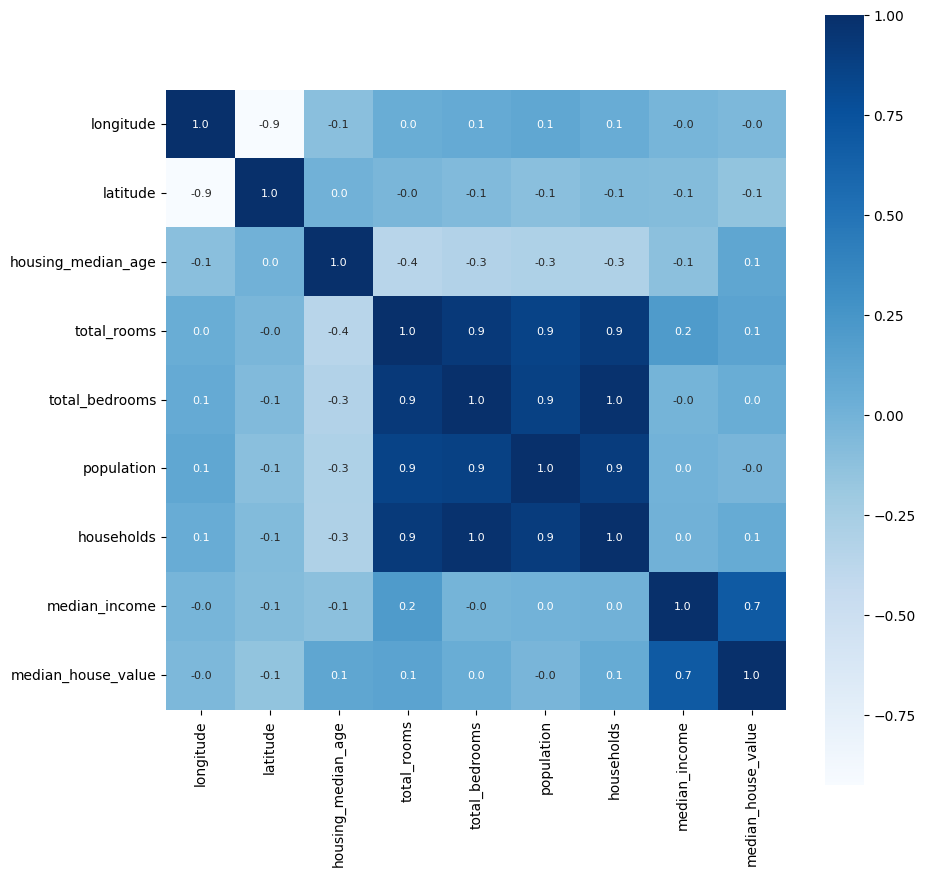

In [ ]:
#Construct a Heatmap to understand correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

DATA PREPROCESSING

In [ ]:
#Separating Price column from other columns
X = new_house_dataset.drop(['median_house_value'], axis=1)
Y = new_house_dataset['median_house_value']

In [ ]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                  25         1665           374.0   
20429    -121.21     39.49                  18          697           150.0   
20430    -121.22     39.43                  17         2254           485.0   
20431    -121.32     39.43                  18         1860           409.0   
20432    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  
0   

In [ ]:
print(Y)

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20428     78100
20429     77100
20430     92300
20431     84700
20432     89400
Name: median_house_value, Length: 20433, dtype: int64


TRAIN/TEST SPLITTING

In [ ]:
#Split the Dataset into four variables i.e., X,Y Train and X,Y Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(20433, 8) (16346, 8) (4087, 8)


MODEL TRAINING: LINEAR REGRESSION

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

MODEL EVALUATION: ACCURACY SCORE

In [ ]:
#Accuracy scores of Training Data
training_data_prediction = model.predict(X_train)

In [ ]:
#R Squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print(f"R Squared value: {r2_train * 100:.2f}%")

R Squared value: 63.93%


In [ ]:
#Accuracy scores of Testing Data
testing_data_prediction = model.predict(X_test)

In [ ]:
#R Squared value
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print(f"R Squared value: {r2_test * 100:.2f}%")

R Squared value: 62.63%


BUILDING A PREDICTIVE SYSTEM

In [ ]:
#Taking example of a row
input_data = (-122.26,37.84,42,2555,665,1206,595,2.0804)

#Changing Input data into numpy array
numpy_array = np.asarray(input_data)

#Reshape the data as we are only predicting for one instance
reshaped_input_data = numpy_array.reshape(1, -1)

#Predict the quality
prediction = model.predict(reshaped_input_data)
print(f"The price of the house would be: {prediction}")

The price of the house would be: [198817.49288514]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
